In [9]:
import pandas as pd
import numpy as np
import datetime

# Generate the synthetic sales data
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate sales trend
trend = np.sin(np.arange(len(date_range)) * 2 * np.pi / 365) * 100 + 500

# Generate seasonal variations
seasonality = np.where(
    (date_range.month >= 3) & (date_range.month <= 5),  # Spring season
    np.sin(np.arange(len(date_range)) * 2 * np.pi / 90) * 50,
    np.where(
        (date_range.month >= 6) & (date_range.month <= 8),  # Summer season
        np.sin(np.arange(len(date_range)) * 2 * np.pi / 90) * 30,
        np.where(
            (date_range.month >= 9) & (date_range.month <= 11),  # Autumn season
            np.sin(np.arange(len(date_range)) * 2 * np.pi / 90) * 40,
            np.sin(np.arange(len(date_range)) * 2 * np.pi / 90) * 20  # Winter season
        )
    )
)

# Generate random noise
noise = np.random.normal(0, 20, len(date_range))

# Generate the sales values
sales = trend + seasonality + noise

# Create a DataFrame from the generated data
data = pd.DataFrame({'Date': date_range, 'Sales': sales})

# Save the DataFrame as a CSV file
data.to_csv('sales_data.csv', index=False)


In [10]:
df = pd.read_csv('sales_data.csv')


In [11]:
print(df.head())


         Date       Sales
0  2018-01-01  545.294755
1  2018-01-02  522.704063
2  2018-01-03  499.949413
3  2018-01-04  523.119368
4  2018-01-05  510.755559


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1826 non-null   object 
 1   Sales   1826 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [13]:
df.describe()

,Sales
count,1826.000000
mean,500.035441
std,78.378043
min,331.648233
25%,429.410527
50%,506.978167
75%,555.481298
max,700.286872


In [14]:
df.shape

(1826, 2)

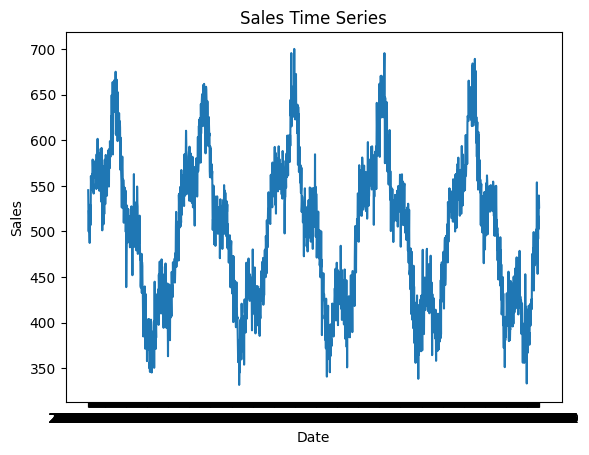

In [15]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series')
plt.show()


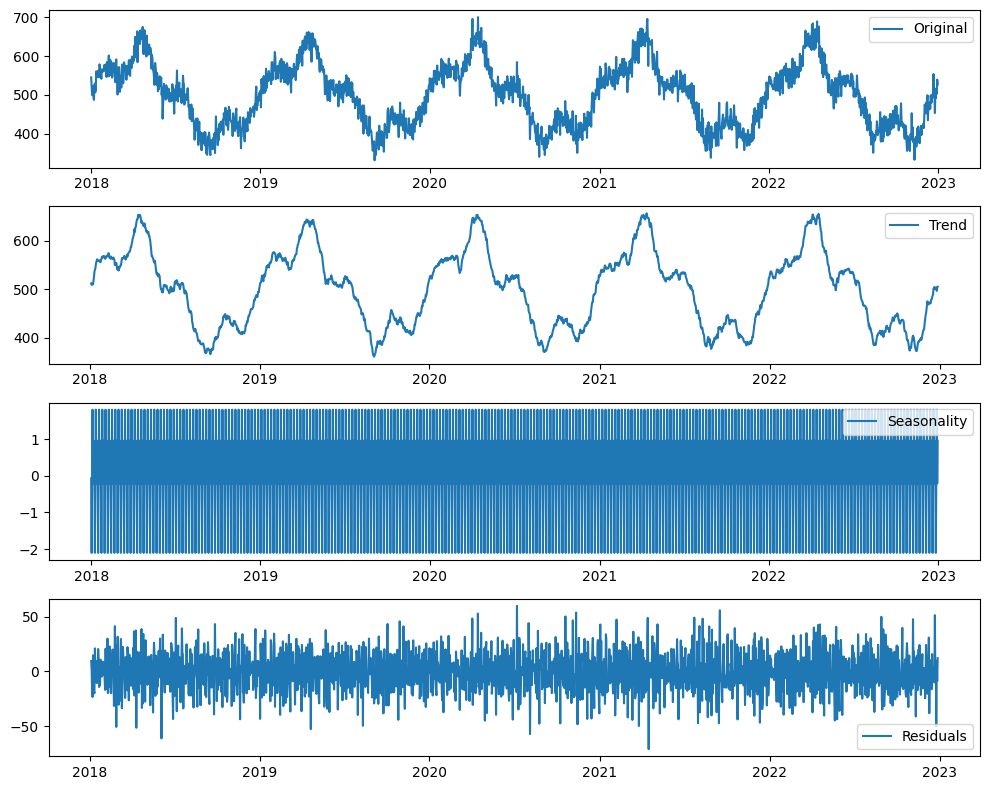

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the sales dataset into a DataFrame
df = pd.read_csv('sales_data.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive')

# Get the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


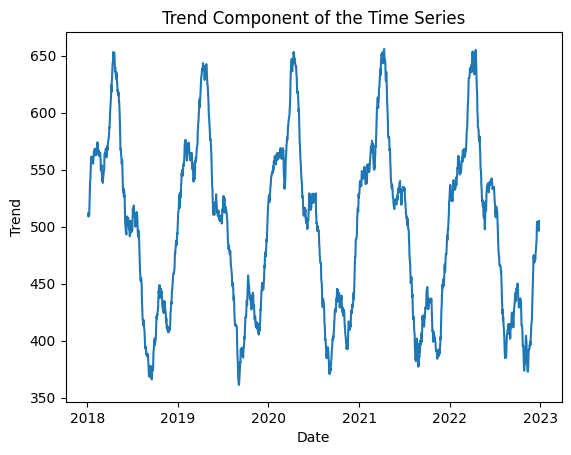

In [22]:
import matplotlib.pyplot as plt

plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component of the Time Series')
plt.show()


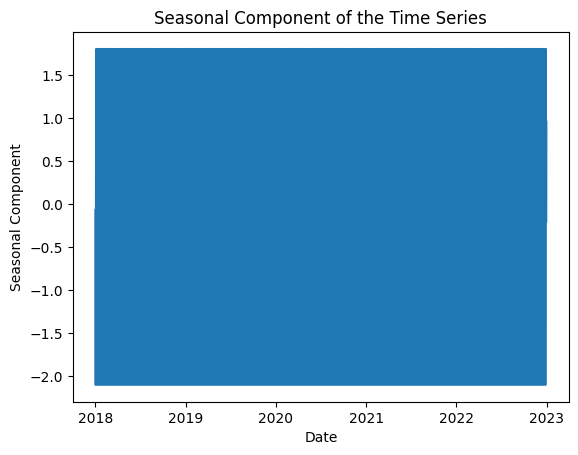

In [23]:
import matplotlib.pyplot as plt

plt.plot(seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of the Time Series')
plt.show()


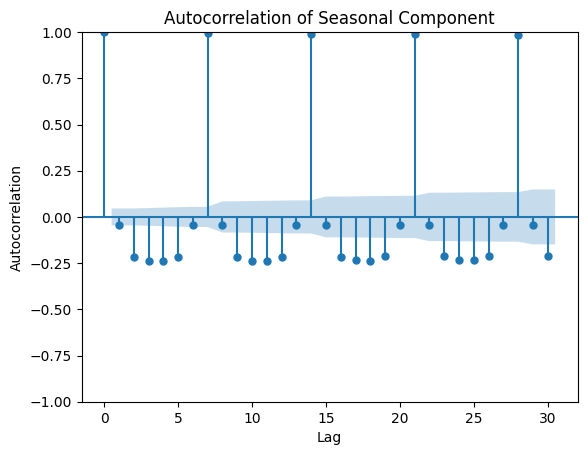

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(seasonal, lags=30)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Seasonal Component')
plt.show()


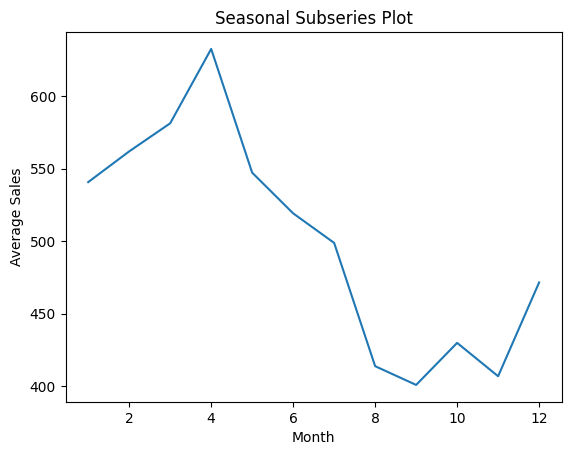

In [27]:
seasonal_subseries = df.groupby(df.index.month)['Sales'].mean()

plt.plot(seasonal_subseries)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Seasonal Subseries Plot')
plt.show()


In [29]:
# Load the sales data into a DataFrame
df = pd.read_csv('sales_data.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)


In [30]:
# Specify the training and testing periods
train_start_date = '2018-01-01'
train_end_date = '2022-12-31'
test_start_date = '2023-01-01'
test_end_date = '2023-12-31'

# Split the data into training and testing sets
train_data = df.loc[train_start_date:train_end_date, 'Sales']
test_data = df.loc[test_start_date:test_end_date, 'Sales']


Test dataset is empty or does not contain valid values.


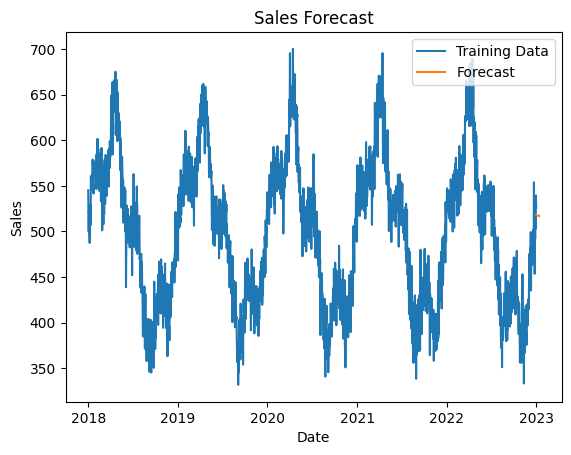

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and Prepare the Data
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the Data into Training and Testing Sets
train_start_date = '2018-01-01'
train_end_date = '2022-12-31'
test_start_date = '2023-01-01'
test_end_date = '2023-12-31'
train_data = df.loc[train_start_date:train_end_date, 'Sales']
test_data = df.loc[test_start_date:test_end_date, 'Sales']

# Fit the ARIMA Model
#p, d, q = 1, 0, 1  # Example values for ARIMA order
#model = ARIMA(train_data, order=(p, d, q))
#model_fit = model.fit()

# Make Sales Forecasts
forecast_periods = 12
forecast_values = model_fit.forecast(steps=forecast_periods)

# Evaluate the Model
if len(test_data) > 0:
    mse = np.mean((forecast_values - test_data.values) ** 2)
    mae = np.mean(np.abs(forecast_values - test_data.values))
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
else:
    print("Test dataset is empty or does not contain valid values.")

# Visualize the Forecast
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()
